# Automatic Differentiation

```
x = 5
y = x^2


(dy)/(dx) = 2x = 2(5) = 10
```

In [1]:
import torch
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor(5.0)
x

tensor(5.)

In [3]:
x.requires_grad_() # contagiously track gradients through forward pass

tensor(5., requires_grad=True)

In [4]:
y = x**2

In [5]:
y.backward() # use autodiff

In [6]:
x.grad

tensor(10.)

Repeat but with TensorFlow

In [7]:
x = tf.Variable(5.0)
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>

In [8]:
with tf.GradientTape() as t:
    t.watch(x) # track forward pass
    y = x**2

In [9]:
t.gradient(y,x) # use autodiff

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

# The Line Equation as a Tensor Graph #

Lione equation: y = mx + b 

In [10]:
x = torch.tensor([0,1,2,3,4,5,6,7.]) # E.g.: Dosage of drug for treating Alzheimer's disease
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [11]:
# m= -0.5 and b = 2
# y = -0.5*x + 2 + torch.normal(mean=torch.zeros(8), std=0.2)
# y

In [12]:
# For reproducibility of this tutorial, here's a fixed example of y values obtained by running the commented-out line above:
y = torch.tensor([1.86,1.31,.62,.33,.09,-.67,-1.23,-1.37]) # E.g.: Patient's "forgetfulness score"
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

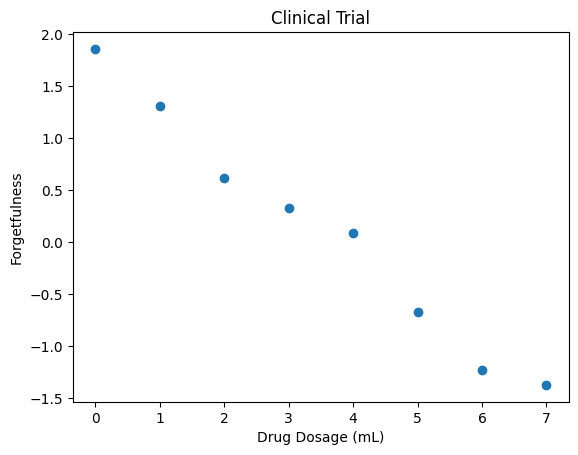

In [13]:
fig, ax = plt.subplots()
plt.title('Clinical Trial')
plt.xlabel('Drug Dosage (mL)')
plt.ylabel('Forgetfulness')
_=ax.scatter(x,y)

In [14]:
# IOnitialize the slope parameter m with a "random" value of 0.9
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

In [15]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

In [18]:
def regression_plot(my_x,my_y,my_m,my_b):
    '''
    fig, ax = plt.subplots()
    
    ax.scatter(my_x,my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min, y_max = my_m*x_min + my_b, my_m*x_max + my_b
    
    ax.set_xlim([x_min, x_max])
    _=ax.plot([x_min, x_max], [y_min, y_max])
    '''
    # Convert input data for plotting
    x_np = my_x.detach().numpy() if torch.is_tensor(my_x) else my_x
    y_np = my_y.detach().numpy() if torch.is_tensor(my_y) else my_y
    m_val = my_m.item() if torch.is_tensor(my_m) else my_m
    b_val = my_b.item() if torch.is_tensor(my_b) else my_b
    
    fig, ax = plt.subplots()
    ax.scatter(x_np, y_np)
    
    x_min, x_max = ax.get_xlim()
    
    # Ensure y_min and y_max are floats
    y_min = float(m_val * x_min + b_val)
    y_max = float(m_val * x_max + b_val)
    
    ax.set_xlim([x_min, x_max])
    ax.plot([x_min, x_max], [y_min, y_max])

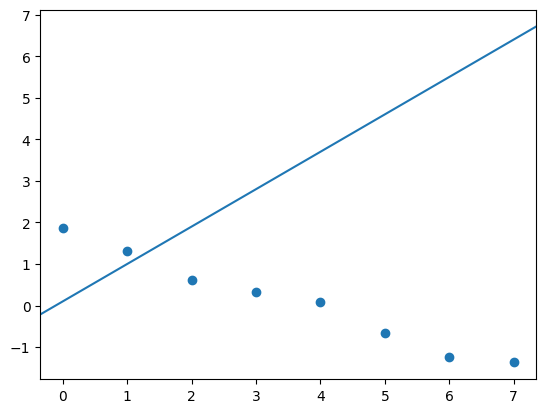

In [19]:
regression_plot(x,y,m,b)

In [21]:
def regression(my_x,my_m,my_b):
    return my_x*my_m+my_b